In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train=pd.read_csv("../../data/mnist/mnist_train.csv",header=None)

In [3]:
df_train.shape

(60000, 785)

In [4]:
df_train.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
935,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26035,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36686,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13465,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test=pd.read_csv("../../data/mnist/mnist_test.csv",header=None)

In [6]:
df_test.shape

(10000, 785)

In [7]:
x_train=df_train.iloc[:,1:].values/255
y_train=df_train.iloc[:,0].values
x_test=df_test.iloc[:,1:].values/255
y_test=df_test.iloc[:,0].values


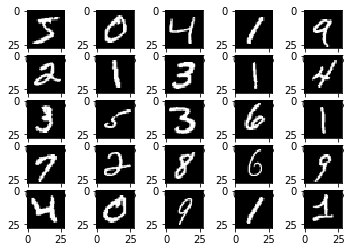

In [9]:
fig , axes =plt.subplots(5,5)
for i,ax in enumerate(fig.axes):
    ax.imshow(x_train[i].reshape((28,28)),cmap="gray")

   

In [10]:
import keras

Using TensorFlow backend.


In [11]:
from time import time

In [12]:
y_train=keras.utils.to_categorical(y_train)
Y_test=keras.utils.to_categorical(y_test)

In [13]:
y_train.shape

(60000, 10)

In [14]:
x_train_img = x_train.reshape((-1, 28, 28, 1))
x_test_img = x_test.reshape((-1, 28, 28, 1))
x_train_img.shape

(60000, 28, 28, 1)

In [ ]:
tensorboard = keras.callbacks.TensorBoard(log_dir = "/tmp/tf/%d" % time())

model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape = (28,28,1)))
model.add(keras.layers.Conv2D(32, (5, 5), activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size = (2, 2)))
model.add(keras.layers.Dropout(rate = 0.4))
model.add(keras.layers.Conv2D(64, (5, 5), activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size = (2, 2)))
model.add(keras.layers.Dropout(rate = 0.4))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(400, activation="relu"))
model.add(keras.layers.Dropout(rate = 0.4))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

model.compile(optimizer = "adam"
              , metrics = ["accuracy"]
              , loss = keras.losses.categorical_crossentropy)

model.fit(x_train_img, y_train
          , callbacks=[tensorboard]
          , batch_size = 64
          , epochs = 5, verbose = 1 )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
__________